<b>Question 2</b>

In [1]:
# import relevant modules with pd as an alias for pandas, plt as an alias for matplotlib.pyplot and np as an alias for numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file "GBA_Data.csv" into a dataframe name credit_facility
credit_facility = pd.read_csv("ECA_data.csv")

# capture dataframe
df = pd.DataFrame(credit_facility)
df

ID   LIMIT    BALANCE  INCOME  RATING  GENDER  EDUCATION  MARITAL  \
0          1  210000      0.000  235822       1       1        1.0      2.0   
1          2  260000  10928.050  278481       0       0        2.0      2.0   
2          3  400000  65397.850  431993       0       0        3.0      1.0   
3          4   20000   3695.300   22368       0       0        2.0      1.0   
4          5  180000     68.250  166900       0       1        2.0      1.0   
...      ...     ...        ...     ...     ...     ...        ...      ...   
18764  18762  220000  33065.900  225862       0       0        3.0      1.0   
18765  18763  150000    294.525  149966       0       0        3.0      2.0   
18766  18764   30000    623.875   30327       1       0        2.0      2.0   
18767  18765   80000      0.000   94607       1       0        3.0      1.0   
18768  18766   50000   8387.575   40267       1       0        2.0      1.0   

       AGE  S1  ...      B1      B2      B3      B4      B5     R1     R2  \
0       30   0  ...       0       0       0       0       0      0      0   
1       31   0  ...   54074   46407   38874   31324   24031   2000   2000   
2       51   0  ...  343591  352484  338823  283288  185288  15000  14000   
3       58  -1  ...   21470     200       0   28740    1295      0      0   
4       42   0  ...    1260     598    2056    4300    1802    598   2056   
...    ...  ..  ...     ...     ...     ...     ...     ...    ...    ...   
18764   39   0  ...  192815  208365   88004   31237   15980  20000   5003   
18765   43  -1  ...    1828    3502    8979    5190       0   3526   8998   
18766   37   3  ...    3356    2758   20878   20582   19357      0  22000   
18767   41  -1  ...   78379   76304   52774   11855   48944   3409   1178   
18768   46   0  ...   48905   49764   36535   32428   15313   1800   1430   

          R3     R4     R5  
0          0      0      0  
1       2000   2000  72000  
2      11500   8000   7000  
3      28740   1565      0  
4       4300   1802   3691  
...      ...    ...    ...  
18764   3047   5000   1000  
18765    129      0      0  
18766   4200   2000   3100  
18767   1926  52964   1804  
18768   1000   1000   1000  

[18769 rows x 24 columns]

<u>1) Incorrect data type for R3

In [2]:
# obtain an overview of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

In [3]:
# remove "$" and "," under R3 
df["R3"] = df["R3"].str.replace(",", "", regex = True)
df["R3"] = df["R3"].str.replace("$", "", regex = True)

# convert datatype for R3 to integer
df["R3"] = df["R3"].astype(int)

In [4]:
# check output with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

<u>2) Null values under education and marital

In [5]:
# count the number of null values in each column of DataFrame
df.isnull().sum(axis = 0)

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [6]:
# remove rows containing null values under EDUCATION and MARITAL columns using dropna. method
df.dropna(subset = ["EDUCATION", "MARITAL"], inplace = True)

In [7]:
# verify count of null values in each column of DataFrame
df.isnull().sum(axis = 0)

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

<u>3) Duplicated rows

In [8]:
# check for any duplications in data
df[df.duplicated()]

ID   LIMIT    BALANCE  INCOME  RATING  GENDER  EDUCATION  MARITAL  AGE  \
132  132  200000   1270.675  188181       0       1        2.0      1.0   40   
379  378  240000  39804.975  256476       0       1        2.0      2.0   35   
422  420   30000   1883.700   32877       1       1        1.0      2.0   23   

     S1  ...      B1      B2      B3      B4      B5     R1    R2    R3  \
132  -1  ...   32333   12610    7850     977    9205  13587  7850     0   
379   0  ...  232729  223431  226361  223508  238587  10000  8000  9000   
422   2  ...   10454   11862   12104   12351    8000   2000   242   247   

        R4    R5  
132   9205     0  
379  19000  9000  
422   2000     0  

[3 rows x 24 columns]

In [9]:
# drop duplicated rows from DataFrame
df = df.drop_duplicates()

In [10]:
# verify for any duplications in data
df[df.duplicated()]

Empty DataFrame
Columns: [ID, LIMIT, BALANCE, INCOME, RATING, GENDER, EDUCATION, MARITAL, AGE, S1, S2, S3, S4, S5, B1, B2, B3, B4, B5, R1, R2, R3, R4, R5]
Index: []

[0 rows x 24 columns]

In [11]:
# verify output
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18717 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18717 non-null  int64  
 1   LIMIT      18717 non-null  int64  
 2   BALANCE    18717 non-null  float64
 3   INCOME     18717 non-null  int64  
 4   RATING     18717 non-null  int64  
 5   GENDER     18717 non-null  int64  
 6   EDUCATION  18717 non-null  float64
 7   MARITAL    18717 non-null  float64
 8   AGE        18717 non-null  int64  
 9   S1         18717 non-null  int64  
 10  S2         18717 non-null  int64  
 11  S3         18717 non-null  int64  
 12  S4         18717 non-null  int64  
 13  S5         18717 non-null  int64  
 14  B1         18717 non-null  int64  
 15  B2         18717 non-null  int64  
 16  B3         18717 non-null  int64  
 17  B4         18717 non-null  int64  
 18  B5         18717 non-null  int64  
 19  R1         18717 non-null  int64  
 20  R2    

<u>4) Unusual values for age

In [12]:
# obtain summary of statistics for DataFrame using .describe()
df.describe()

ID          LIMIT        BALANCE         INCOME  \
count  18717.000000   18717.000000   18717.000000   18717.000000   
mean    9382.482342  168309.754768    9135.126690  177817.991184   
std     5418.307142  129501.796160   13056.066586  143206.635373   
min        1.000000   10000.000000       0.000000   10000.000000   
25%     4688.000000   50000.000000     644.350000   56428.000000   
50%     9383.000000  140000.000000    3975.125000  148174.000000   
75%    14077.000000  240000.000000   11986.275000  257209.000000   
max    18766.000000  800000.000000  130692.450000  908846.000000   

             RATING        GENDER     EDUCATION       MARITAL           AGE  \
count  18717.000000  18717.000000  18717.000000  18717.000000  18717.000000   
mean       0.219586      0.617994      1.788054      1.514826     35.572367   
std        0.413978      0.485891      0.731406      0.519606      9.559773   
min        0.000000      0.000000      0.000000      0.000000     -1.000000   
25%        0.000000      0.000000      1.000000      1.000000     28.000000   
50%        0.000000      1.000000      2.000000      2.000000     34.000000   
75%        0.000000      1.000000      2.000000      2.000000     41.000000   
max        1.000000      1.000000      3.000000      2.000000    199.000000   

                 S1  ...             B1             B2             B3  \
count  18717.000000  ...   18717.000000   18717.000000   18717.000000   
mean       0.129081  ...   50060.936582   48242.362238   45092.442646   
std        0.954515  ...   71982.947123   70374.559702   66159.494890   
min       -1.000000  ...  -69777.000000 -157264.000000  -65167.000000   
25%        0.000000  ...    3100.000000    2866.000000    2528.000000   
50%        0.000000  ...   21415.000000   20442.000000   19533.000000   
75%        0.000000  ...   65243.000000   62082.000000   57777.000000   
max        7.000000  ...  743970.000000  855086.000000  706864.000000   

                  B4             B5            R1             R2  \
count   18717.000000   18717.000000  1.871700e+04   18717.000000   
mean    41115.996046   39678.976278  6.030960e+03    5654.674520   
std     61741.750777   59953.359712  2.292500e+04   18634.449439   
min    -81334.000000 -209051.000000  0.000000e+00       0.000000   
25%      1962.000000    1438.000000  1.000000e+03     581.000000   
50%     18372.000000   17443.000000  2.137000e+03    2000.000000   
75%     50827.000000   49854.000000  5.002000e+03    5000.000000   
max    823540.000000  514975.000000  1.227082e+06  889043.000000   

                  R3             R4             R5  
count   18717.000000   18717.000000   18717.000000  
mean     4937.772720    4768.925415    5192.848801  
std     16477.236941   15049.674687   17444.993387  
min         0.000000       0.000000       0.000000  
25%       316.000000     284.000000     223.000000  
50%      1500.000000    1505.000000    1550.000000  
75%      4069.000000    4072.000000    4100.000000  
max    621000.000000  426529.000000  527143.000000  

[8 rows x 24 columns]

In [13]:
# drop rows containing for AGE < 0 (i.e. signify negative values for age)
df = df.drop(df.index[df["AGE"] < 0])

# drop rows containing for AGE equal to 199
df = df.drop(df.index[df["AGE"] == 199])

In [14]:
# verify summary of statistics for DataFrame using .describe()
df.describe()

ID          LIMIT        BALANCE         INCOME  \
count  18707.000000   18707.000000   18707.000000   18707.000000   
mean    9381.995937  168335.044636    9136.823407  177846.903886   
std     5416.853252  129503.452122   13056.692396  143206.451816   
min        1.000000   10000.000000       0.000000   10000.000000   
25%     4689.500000   50000.000000     644.262500   56467.000000   
50%     9383.000000  140000.000000    3976.525000  148182.000000   
75%    14073.500000  240000.000000   11988.637500  257215.500000   
max    18766.000000  800000.000000  130692.450000  908846.000000   

             RATING        GENDER     EDUCATION       MARITAL           AGE  \
count  18707.000000  18707.000000  18707.000000  18707.000000  18707.000000   
mean       0.219704      0.618111      1.788101      1.514834     35.538462   
std        0.414057      0.485863      0.731376      0.519616      9.161899   
min        0.000000      0.000000      0.000000      0.000000     21.000000   
25%        0.000000      0.000000      1.000000      1.000000     28.000000   
50%        0.000000      1.000000      2.000000      2.000000     34.000000   
75%        0.000000      1.000000      2.000000      2.000000     41.000000   
max        1.000000      1.000000      3.000000      2.000000     80.000000   

                 S1  ...             B1             B2             B3  \
count  18707.000000  ...   18707.000000   18707.000000   18707.000000   
mean       0.128989  ...   50069.705885   48249.942802   45097.971561   
std        0.954536  ...   71984.518738   70374.144907   66156.247415   
min       -1.000000  ...  -69777.000000 -157264.000000  -65167.000000   
25%        0.000000  ...    3101.500000    2871.500000    2532.500000   
50%        0.000000  ...   21419.000000   20453.000000   19534.000000   
75%        0.000000  ...   65251.500000   62110.000000   57786.000000   
max        7.000000  ...  743970.000000  855086.000000  706864.000000   

                  B4             B5            R1             R2  \
count   18707.000000   18707.000000  1.870700e+04   18707.000000   
mean    41127.475865   39690.696050  6.033098e+03    5656.672315   
std     61753.167798   59963.897709  2.293080e+04   18639.093512   
min    -81334.000000 -209051.000000  0.000000e+00       0.000000   
25%      1965.000000    1440.000000  1.000000e+03     582.000000   
50%     18373.000000   17446.000000  2.138000e+03    2000.000000   
75%     50844.000000   49870.500000  5.002000e+03    5000.000000   
max    823540.000000  514975.000000  1.227082e+06  889043.000000   

                  R3             R4             R5  
count   18707.000000   18707.000000   18707.000000  
mean     4939.935746    4770.806062    5195.074731  
std     16481.357381   15053.436795   17449.368395  
min         0.000000       0.000000       0.000000  
25%       316.000000     285.500000     223.500000  
50%      1500.000000    1507.000000    1556.000000  
75%      4073.500000    4074.500000    4100.000000  
max    621000.000000  426529.000000  527143.000000  

[8 rows x 24 columns]

<b>Question 3</b>

<u>Histogram

In [15]:
# capture INCOME column of the DataFrame
df_income = pd.DataFrame(df, columns = ["INCOME"])
df_income

INCOME
0      235822
1      278481
2      431993
3       22368
4      166900
...       ...
18764  225862
18765  149966
18766   30327
18767   94607
18768   40267

[18707 rows x 1 columns]

In [16]:
# assigning income values to income group by creating a list of conditions
conditions = [
    (df_income["INCOME"] >= 10000) & (df_income["INCOME"] < 60000), (df_income["INCOME"] >= 60000) & (df_income["INCOME"] < 110000),
    (df_income["INCOME"] >= 110000) & (df_income["INCOME"] < 160000), (df_income["INCOME"] >= 160000) & (df_income["INCOME"] < 210000), 
    (df_income["INCOME"] >= 210000) & (df_income["INCOME"] < 260000), (df_income["INCOME"] >= 260000) & (df_income["INCOME"] < 310000),
    (df_income["INCOME"] >= 310000) & (df_income["INCOME"] < 360000), (df_income["INCOME"] >= 360000) & (df_income["INCOME"] < 410000),
    (df_income["INCOME"] >= 410000) & (df_income["INCOME"] < 460000), (df_income["INCOME"] >= 460000) & (df_income["INCOME"] < 510000),
    (df_income["INCOME"] >= 510000) & (df_income["INCOME"] < 560000), (df_income["INCOME"] >= 560000) & (df_income["INCOME"] < 610000),
    (df_income["INCOME"] >= 610000) & (df_income["INCOME"] < 660000), (df_income["INCOME"] >= 660000) & (df_income["INCOME"] < 710000),
    (df_income["INCOME"] >= 710000) & (df_income["INCOME"] < 760000), (df_income["INCOME"] >= 760000) & (df_income["INCOME"] < 810000),
    (df_income["INCOME"] >= 810000) & (df_income["INCOME"] < 860000), (df_income["INCOME"] >= 860000) & (df_income["INCOME"] < 910000),
    (df_income["INCOME"] >= 910000) & (df_income["INCOME"] <= 960000)
]

# creating corresponding values to fill
income_bins = ["10000-59999", "60000-109999", "110000-159999",
               "159999-209999", "210000-259999", "260000-309999",
               "310000-359999", "360000-409999", "410000-459999",
               "460000-509999", "510000-559999", "560000-609999",
               "610000-659999", "660000-709999", "710000-759999",
               "760000-809999", "810000-859999", "860000-909999",
               "910000-960000",
              ]
           
# using np.select() to set values using multiple conditions
df_income["INCOME RANGE"] = np.select(conditions, income_bins)

# create pivot table for income
income_pivot = pd.pivot_table(df_income, index = "INCOME RANGE", values = "INCOME", aggfunc = "count")
income_pivot

INCOME
INCOME RANGE         
10000-59999      5077
110000-159999    2210
159999-209999    2205
210000-259999    1976
260000-309999    1295
310000-359999     990
360000-409999     776
410000-459999     537
460000-509999     389
510000-559999     312
560000-609999     223
60000-109999     2643
610000-659999      23
660000-709999      20
710000-759999      11
760000-809999      10
810000-859999       7
860000-909999       3

In [17]:
# cast "INCOME" column of the DataFrame into a list 
income_list = list(df_income["INCOME"])

# income_min and income_max are the minimum and maximum value respectively of the income list
income_min = min(income_list)
income_max = max(income_list)

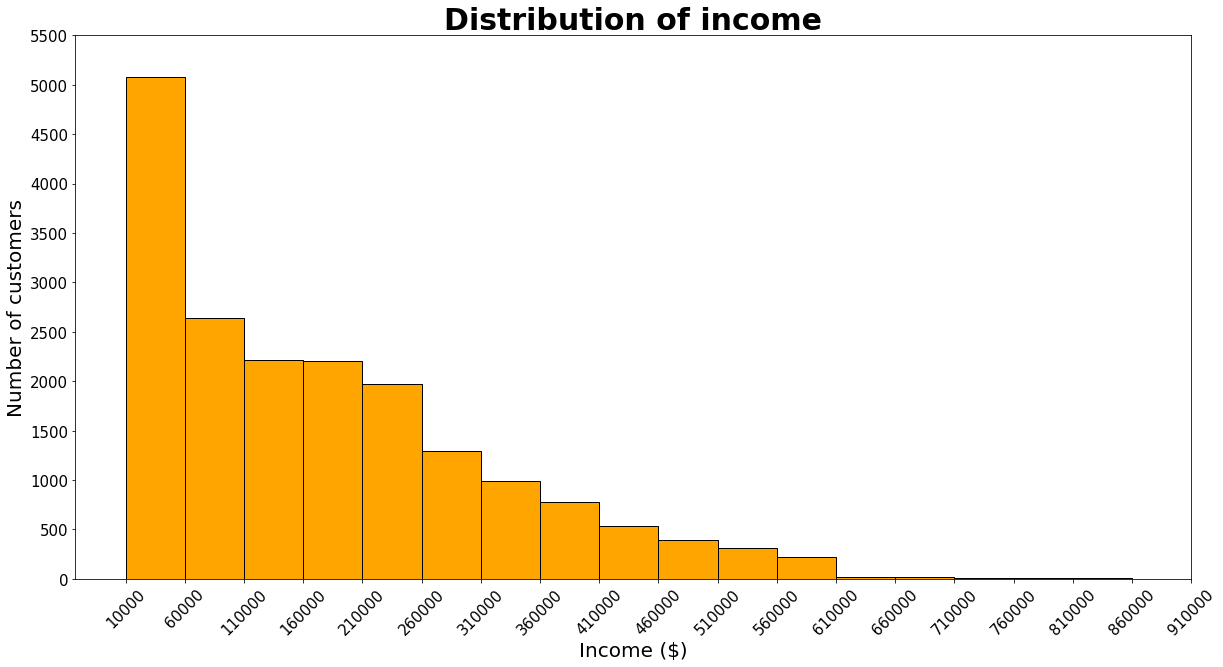

In [18]:
# figure assigns an area for the chart. Figsize represents the figure size in inches.
plt.figure(figsize = (20,10))

# histogram with range from 0 to 960000, bins are centered between the bin edges, vertical orientation
plt.hist(income_list, bins = range(income_min, income_max, 50000), color = "orange", align = "mid", orientation = "vertical", edgecolor = "black")
plt.title("Distribution of income", fontsize = 30, weight = "bold")
plt.xticks(ticks = range(10000, 960000, 50000), labels = range(10000, 960000, 50000), fontsize = 15, rotation = 45)
plt.yticks(ticks = range(0, 6000, 500), labels = range(0, 6000, 500), fontsize = 15)
plt.xlabel("Income ($)", fontsize = 20)
plt.ylabel("Number of customers", fontsize = 20)

plt.show()

<u>Bar Chart

In [19]:
# capture GENDER and EDUCATION column of DataFrame
df_edu = pd.DataFrame(df, columns = ["GENDER", "EDUCATION"])
df_edu

GENDER  EDUCATION
0           1        1.0
1           0        2.0
2           0        3.0
3           0        2.0
4           1        2.0
...       ...        ...
18764       0        3.0
18765       0        3.0
18766       0        2.0
18767       0        3.0
18768       0        2.0

[18707 rows x 2 columns]

In [20]:
# create frequency columns based on gender
df_edu["FREQUENCY"] = df.groupby(["GENDER"])["GENDER"].transform("count")

# create pivot table for education levels
edu_pivot = df_edu.pivot_table(index = "EDUCATION", values = "FREQUENCY", columns = "GENDER", aggfunc = "count")

# rename index and column values for EDUCATION
edu_pivot.rename(index = {0.0:"Others", 1.0:"Postgraduate", 2.0 :"Tertiary", 3.0:"High School"}, inplace = True)
edu_pivot.rename(columns = {0:"Male", 1:"Female"}, inplace = True)
edu_pivot


GENDER        Male  Female
EDUCATION                 
Others         126     208
Postgraduate  2532    3871
Tertiary      3274    5589
High School   1212    1895

Text(0, 0.5, 'Number of customers')

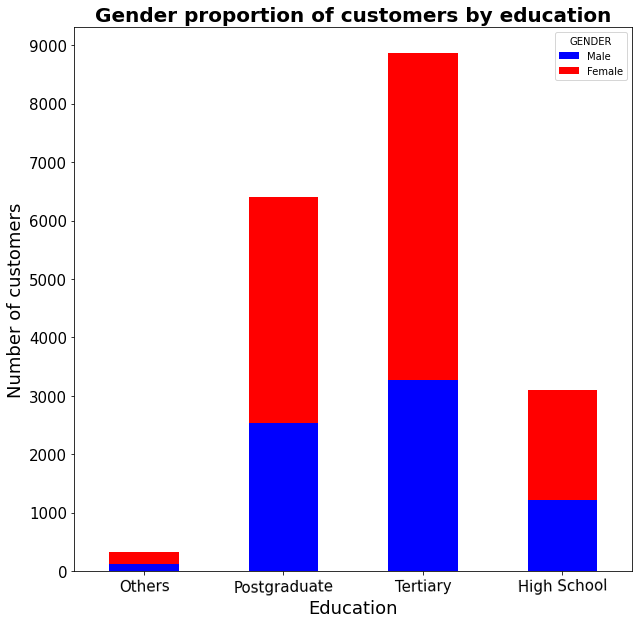

In [21]:
# plot bar chart using pivot table
bar_chart = edu_pivot.plot.bar(stacked = True, color = ["blue", "red"], figsize = (10,10), rot = 1)

plt.title("Gender proportion of customers by education", fontsize = 20, weight = "bold")
plt.xticks(fontsize = 15)
plt.yticks(ticks = range(0, 10000, 1000), labels = range(0, 10000, 1000), fontsize = 15)
plt.xlabel("Education", fontsize = 18)
plt.ylabel("Number of customers", fontsize = 18)

<u>Pie Chart

In [22]:
# capture GENDER column of DataFrame
df_gender = pd.DataFrame(df, columns = ["GENDER"])
df_gender

GENDER
0           1
1           0
2           0
3           0
4           1
...       ...
18764       0
18765       0
18766       0
18767       0
18768       0

[18707 rows x 1 columns]

In [23]:
# rename 0 and 1 to "Male" and "Female" respectively
df_gender.replace(1, "Female", inplace = True)
df_gender.replace(0, "Male", inplace = True)

Female    11563
Male       7144
Name: GENDER, dtype: int64


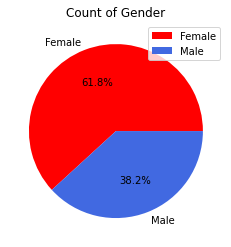

In [24]:
# set colours to the pie chart
colours = ["red", "royalblue"]

# storing the gender types in x
x = list(df_gender["GENDER"].value_counts().keys())

# storing the number of customers in y
y = list(df_gender["GENDER"].value_counts())

# plotting of pie chart with respect to the assigned colours, add in percentage
plt.pie(y, labels = x, autopct = "%.1f%%", colors = colours)

# set the pie chart's title and legend
plt.title("Count of Gender")
plt.legend()

# count of gender and displaying its value
values = df_gender["GENDER"].value_counts()
print(values)


<u>Bar Chart

In [25]:
# capture AGE of DataFrame
df_age = pd.DataFrame(df, columns = ["AGE"])
df_age

AGE
0       30
1       31
2       51
3       58
4       42
...    ...
18764   39
18765   43
18766   37
18767   41
18768   46

[18707 rows x 1 columns]

In [26]:
# assigning ages to age group by creating a list of conditions
conditions = [
    (df_age["AGE"] >= 20) & (df_age["AGE"] < 30), (df_age["AGE"] >= 30) & (df_age["AGE"] < 40),
    (df_age["AGE"] >= 40) & (df_age["AGE"] < 50), (df_age["AGE"] >= 50) & (df_age["AGE"] < 60), 
    (df_age["AGE"] >= 60) & (df_age["AGE"] < 70), (df_age["AGE"] >= 70) & (df_age["AGE"] <= 80)
]

# creating corresponding range to fill
age_group = ["20-29", 
             "30-39", 
             "40-49",
             "50-59", 
             "60-69", 
             "70-80",
              ]
           
# using np.select() to set values using multiple conditions
df_age["AGE GROUP"] = np.select(conditions, age_group)

# create pivot table for age
age_pivot = df_age.pivot_table(index = "AGE GROUP", values = "AGE", aggfunc = "count")
age_pivot


AGE
AGE GROUP      
20-29      5923
30-39      7042
40-49      4078
50-59      1465
60-69       184
70-80        15

Text(0, 0.5, 'Number of customers')

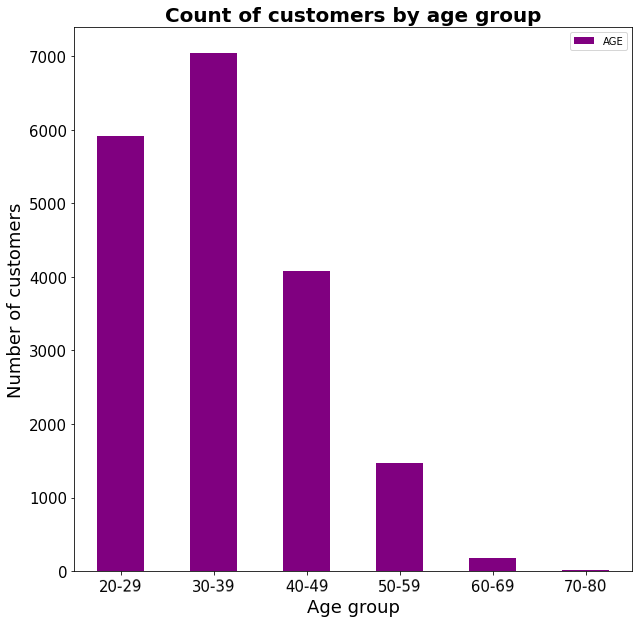

In [27]:
# plot bar chart based on pivot table
bar_chart = age_pivot.plot.bar(color = "purple", figsize = (10,10), rot = 1)

plt.title("Count of customers by age group", fontsize = 20, weight = "bold")
plt.xticks(fontsize = 15)
plt.yticks(ticks = range(0, 8000, 1000), labels = range(0, 8000, 1000), fontsize = 15)
plt.xlabel("Age group", fontsize = 18)
plt.ylabel("Number of customers", fontsize = 18)

<u>Scatter plot

Text(0.5, 1.0, 'Relationship Between Income And Credit Limit')

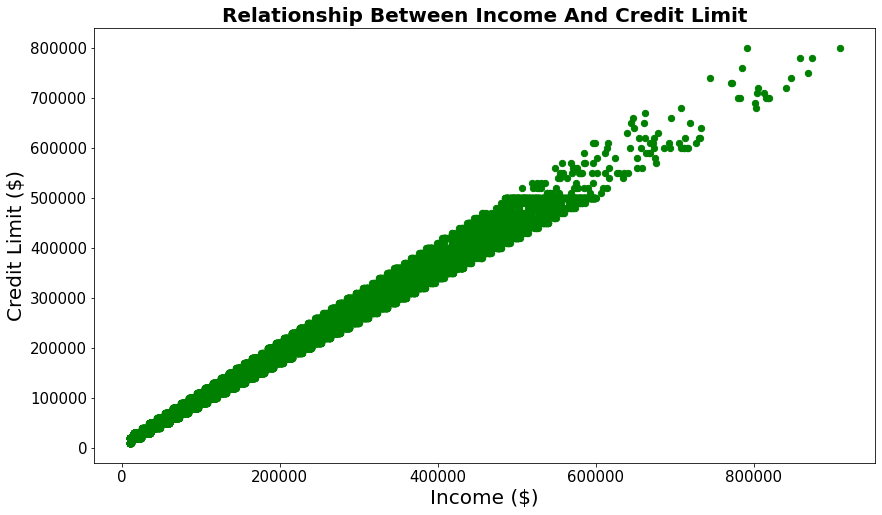

In [28]:
# plot scatter plot
plt.figure(figsize = (14,8))
plt.scatter(df["INCOME"], df["LIMIT"], c = "green", s = 40)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Income ($)".title(), fontsize = 20)
plt.ylabel("Credit limit ($)".title(), fontsize = 20)
plt.title("Relationship between income and credit limit".title(), fontsize = 20, weight = "bold")

<b>Question 4</b>

In [29]:
# import relevant modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm

<u>Data reduction

In [30]:
# identify correlations among the individual columns with B1
df.corr()["B1"]

ID           0.017172
LIMIT        0.279701
BALANCE      0.950921
INCOME       0.277540
RATING      -0.015861
GENDER      -0.033624
EDUCATION   -0.010089
MARITAL     -0.011151
AGE          0.057988
S1           0.116271
S2           0.111995
S3           0.085214
S4           0.090648
S5           0.088679
B1           1.000000
B2           0.938996
B3           0.894147
B4           0.853486
B5           0.824101
R1           0.113928
R2           0.124796
R3           0.144919
R4           0.145248
R5           0.187097
Name: B1, dtype: float64

In [31]:
# drop irrelevant variable columns
df.drop(["ID", "RATING", "GENDER", "LIMIT", "MARITAL", "INCOME", "EDUCATION", "AGE", "S1", "S2", "S3", "S4", "S5", "B3", "B4", "B5", "R1", "R2", "R3", "R4", "R5"], axis = 1, inplace = True)

# verify output
df

BALANCE      B1      B2
0          0.000       0       0
1      10928.050   54074   46407
2      65397.850  343591  352484
3       3695.300   21470     200
4         68.250    1260     598
...          ...     ...     ...
18764  33065.900  192815  208365
18765    294.525    1828    3502
18766    623.875    3356    2758
18767      0.000   78379   76304
18768   8387.575   48905   49764

[18707 rows x 3 columns]

<u>Data cleaning

In [32]:
# obtain summary statistics of DataFrame
df.describe()

BALANCE             B1             B2
count   18707.000000   18707.000000   18707.000000
mean     9136.823407   50069.705885   48249.942802
std     13056.692396   71984.518738   70374.144907
min         0.000000  -69777.000000 -157264.000000
25%       644.262500    3101.500000    2871.500000
50%      3976.525000   21419.000000   20453.000000
75%     11988.637500   65251.500000   62110.000000
max    130692.450000  743970.000000  855086.000000

In [33]:
# analysis of individual columns
df.loc[(df['B1'] == 0) & (df['B2'] == 0) & (df['BALANCE'] == 0)]

BALANCE  B1  B2
0          0.0   0   0
15         0.0   0   0
34         0.0   0   0
36         0.0   0   0
79         0.0   0   0
...        ...  ..  ..
18677      0.0   0   0
18678      0.0   0   0
18742      0.0   0   0
18748      0.0   0   0
18754      0.0   0   0

[717 rows x 3 columns]

In [34]:
# drop rows with 0 values under B1 and B2 columns
df.drop(df[(df['B1'] == 0) & (df['B2'] == 0) & (df['BALANCE'] == 0)].index, inplace = True)

# check output
df.loc[(df['B1'] == 0) & (df['B2'] == 0) & (df['BALANCE'] == 0)]

Empty DataFrame
Columns: [BALANCE, B1, B2]
Index: []

<u>Data transformation

In [35]:
# slicing dataset into dependent variable and independent variables
y = df["B1"]
X = df.drop(columns = "B1", axis = 1)

In [36]:
# initiate estimator and transform data
scaler = preprocessing.StandardScaler()
standardized_data = scaler.fit_transform(X)
standardized_data

array([[ 0.1082477 , -0.05297801],
       [ 4.23993944,  4.25278146],
       [-0.44037729, -0.70299819],
       ...,
       [-0.67335375, -0.66701335],
       [-0.72067647,  0.36760012],
       [-0.08445467, -0.00575317]])

In [37]:
# split DataFrame into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# find shape of training and testing datasets
print(y_train.shape, y_test.shape, X_train.shape, X_test.shape)

(14392,) (3598,) (14392, 2) (3598, 2)


<u>Model Training

In [39]:
# train model using training sets
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# make predictions using the testing set
y_pred = model.predict(X_test)

# comparison of actual and predicted values
pred_y_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred, 'Difference': y_test-y_pred})
pred_y_df

Actual value  Predicted value    Difference
13710          -350       837.971372  -1187.971372
16744          3382      3873.688981   -491.688981
15260         96180     94080.848563   2099.151437
6426          38317     29868.058723   8448.941277
12544         26260     24905.651988   1354.348012
...             ...              ...           ...
12779         88937     90188.920880  -1251.920880
10397         14425     15522.034439  -1097.034439
5391          17699     16390.684599   1308.315401
11041         42329     48907.162498  -6578.162498
15563             8     20102.813965 -20094.813965

[3598 rows x 3 columns]

<b>Question 5</b>

In [41]:
# obtain summary of regression statistics
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     B1   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          1.681e+05
Date:                Fri, 09 Sep 2022   Prob (F-statistic):                        0.00
Time:                        16:04:49   Log-Likelihood:                     -1.6164e+05
No. Observations:               14392   AIC:                                  3.233e+05
Df Residuals:                   14390   BIC:                                  3.233e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
# obtain intercept value
print(model.intercept_)

469.0394338931874
